In [4]:
import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import decode_predictions
from src.model_utils.models import get_efficientnet

## Load image / model

In this example first a sample image is loaded. You can upload/open your own image as well

In [2]:
# Get model and corresponding preprocess function
model, preprocess_image = get_efficientnet(version='B0', weights='imagenet')

2021-12-30 10:58:09.635027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 10:58:09.635451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-30 10:58:09.635498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-30 10:58:09.635540: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-30 10:58:09.637057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

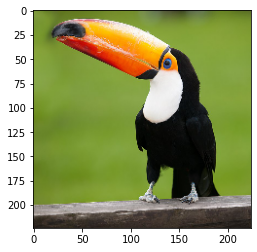

In [5]:
# Open example image and preprocess it
img = PIL.Image.open('images/toucan.jpg')  # Image source: https://en.wikipedia.org/wiki/List_of_toucans
img = preprocess_image(img)
plt.imshow(img.numpy().astype(int));

In [6]:
# Get predictions (expand dims for single image as model expects size (None, 224, 224, 3))
preds = model(np.expand_dims(img, 0))
# Decode it based on keras imagenet_utils package
decoded_preds = decode_predictions(preds.numpy())[0]
print(f"Predicted species: {decoded_preds[0][1]} | Probability: {decoded_preds[0][2]:.2f}")

Predicted species: toucan | Probability: 0.92


# Local Intepretable Model-agnostic Explanations (LIME)

The LIME algorithm works in a couple of easy to understand steps:

1. Generate superpixel areas (areas of multiple pixels clustered by location & color)
2. Create perturbed images by randomly filling some of the superpixel areas with a solid black color
3. For each perturbed image: <br>
    a. Make predictions for each perturbed image <br>
    b. Create weights based on the difference between the perturbed image and the original image (smaller distance == larger weight)
4. Fit a simple interpretable model using the pertubations (vector of [0, 1]'s for each superpixel), predicted probabilities for the class of interest and the created weights. 
5. Define the number of superpixels that should be plotted and plot the superpixels with the highest importance in the simple model (i.e. coefficient if a Linear Regression is used).

#### The example plots three images
a. A plot showing the superpixel boundaries <br>
b. A plot demonstrating a sample perturbed image <br>
c. A plot depicting the most important superpixels for the top-predicted class <br>

You can play around with several parameters (i.e. the number of superpixels, or the number of perturbations). See https://github.com/RikKraanVantage/explainable_AI for the repo and underlying code.

In [7]:
from src.xai.lime import LIME
LIME = LIME(img, model, random_seed=10)

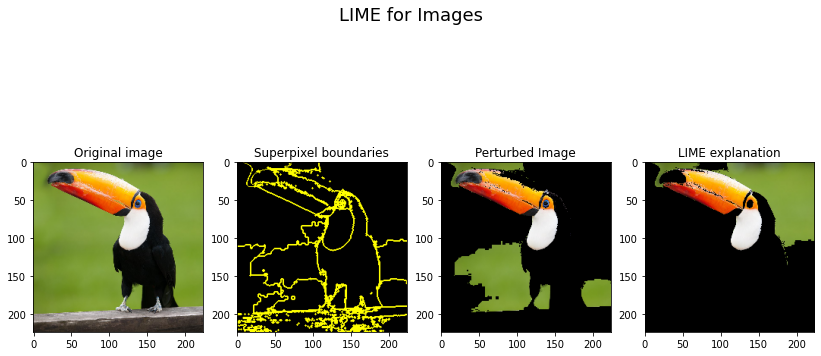

In [15]:
plt.figure(figsize=(14, 7))
plt.subplot(141)
plt.imshow(img.numpy().astype(int))
plt.title('Original image')
plt.subplot(142)
LIME.plot_super_pixel_boundary()
plt.subplot(143)
LIME.plot_perturbed_image()
plt.subplot(144)
LIME.plot_explainable_image(explainable_model_type='decision_tree_regressor')
plt.suptitle('LIME for Images', size=18)
plt.show()